In [1]:
import numpy as np
from amid.lidc import LIDC
import matplotlib.pyplot as plt
from pathlib import Path
import json
import gzip

In [2]:
# Random id from the dataset
idx = '1.3.6.1.4.1.14519.5.2.1.6279.6001.196251645377731223510086726530'

root_path = Path('annotation/lidc/')

In [3]:
# Download the LIDC dataset: https://wiki.cancerimagingarchive.net/pages/viewpage.action?pageId=1966254
# For more information, read this: https://pypi.org/project/amid/
# Place the downloaded archives in any folder and pass the path to the constructor
lids_ds = LIDC(root='/path/to/downloaded/data/folder/')
len(lids_ds.ids)

1018

In [4]:
# Load image
image = lids_ds.image(idx)
image.shape

(512, 512, 541)

In [5]:
# Load aortic centerline knots

with open(root_path / f'knots/{idx}.json') as file:
    knots = json.load(file)

knots

{'id': '1.3.6.1.4.1.14519.5.2.1.6279.6001.196251645377731223510086726530',
 'knots': [[194.0, 234.0, 291.0],
  [193.0, 229.0, 303.0],
  [193.0, 224.0, 322.0],
  [194.0, 225.0, 338.0],
  [194.0, 228.0, 348.0],
  [199.0, 237.0, 369.0],
  [202.0, 243.0, 377.0],
  [211.0, 252.0, 389.0],
  [222.52706480459284, 264.0, 396.1750269683004],
  [232.73787099640913, 270.0, 403.0076311115805],
  [240.0, 272.29155652016146, 404.58829360855316],
  [255.0, 278.0, 408.0],
  [265.0, 279.54228399391394, 403.33196976979735],
  [280.0, 279.0, 398.0],
  [288.0, 276.0, 392.0],
  [293.0, 276.0, 387.0],
  [295.39363606958375, 274.35879014521504, 380.0],
  [304.0472635225061, 273.1311545399326, 362.0],
  [303.0, 273.0, 356.0],
  [303.0, 272.0, 316.0],
  [299.0, 271.0, 296.0],
  [297.92112113928295, 270.0062639083045, 288.0],
  [294.0, 271.0, 272.0],
  [293.0, 269.0, 263.0],
  [291.0, 269.0, 259.0],
  [287.0, 269.0, 236.0],
  [286.0, 266.0, 224.0],
  [283.844889355006, 267.23368937730123, 218.0],
  [281.09529196

In [6]:
# Load aortic mask

with gzip.GzipFile(root_path / f'masks/{idx}.npy.gz', "r") as file:
    mask = np.load(file)
    
mask.shape

(512, 512, 541)

In [7]:
# Some drawing functions
def draw_3d_projection(x, y, axis):
    image = x.max(axis)

    plt.imshow(image, cmap='gray')
    y = np.array(y)

    zs = y.T[-1]
    xs = y.T[:2][::-1][axis]
    plt.plot(zs, xs, linewidth=3)

    plt.axis('off')
    
    
def draw_3d_curve(image, ys, titel=None):
    image = np.clip(image, -1000, 500)

    fig = plt.figure(dpi=128, figsize=(10, 10))
    plt.subplot(1, 2, 1)
    draw_3d_projection(image, ys, axis=0)
    plt.subplot(1, 2, 2)
    draw_3d_projection(image, ys, axis=1)
    plt.tight_layout()
    plt.title(titel)
    plt.show()


In [8]:
# Let's draw the projections of the curve

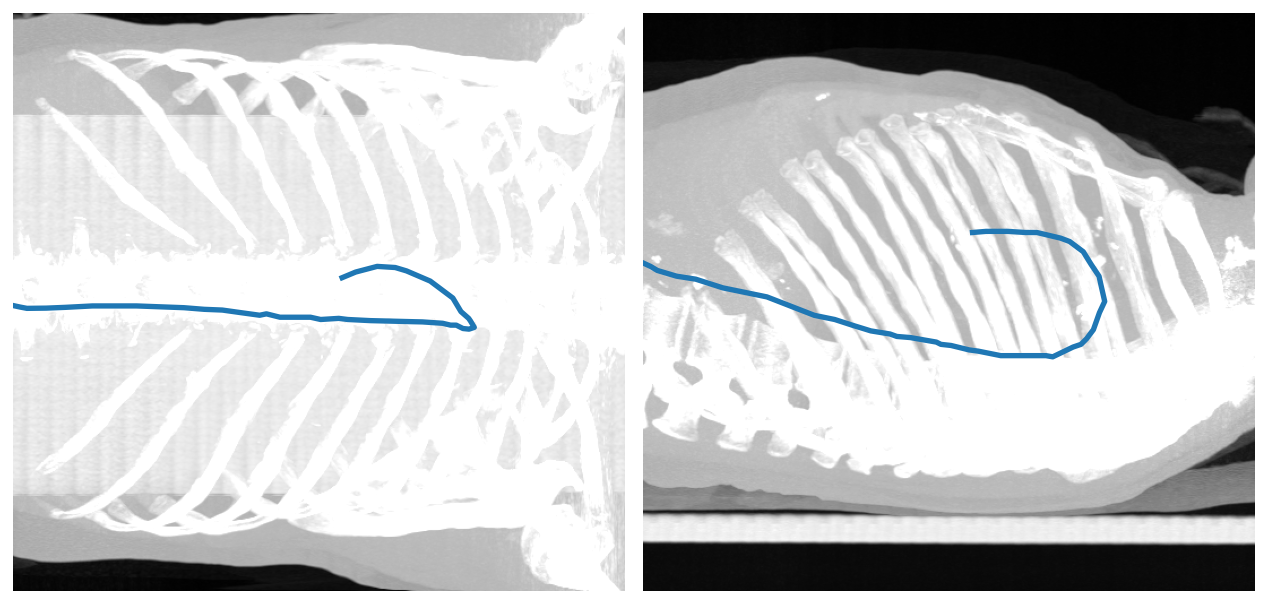

In [9]:
draw_3d_curve(image, np.array(knots['knots']))

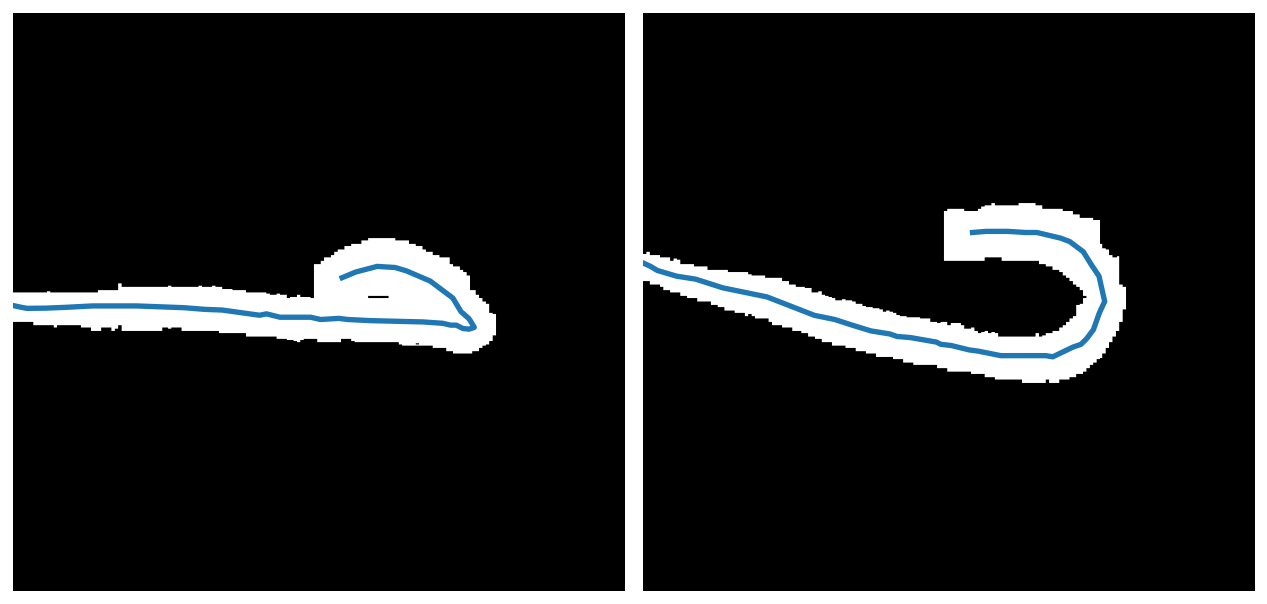

In [10]:
draw_3d_curve(mask, np.array(knots['knots']))